In [4]:
import gurobipy as gp
import numpy as np
from gurobipy import GRB
import matplotlib.pyplot as plt
import string
import matplotlib
import seaborn as sns

In [5]:
n = 8 # size of board
m = 5 # number of looks
s = 4 + (m-1)*3# number of steps
s

16

In [6]:
model = gp.Model('s_schedule')
model.params.LogToConsole = 1
squares = model.addMVar((m, n, n, s), vtype=GRB.BINARY, name="charlotte")
chg = model.addMVar((m, n, n, s-1), vtype=GRB.INTEGER, name="abs_changes")
abs_chg = model.addMVar((m, n, n, s-1), vtype=GRB.BINARY, name="abs_changes")
#model.setObjective(chg.sum(), GRB.MAXIMIZE)

Set parameter Username
Academic license - for non-commercial use only - expires 2023-06-21


In [7]:
# counting moving models
for look in range(m):
    for i in range(n):
        for j in range(n):
            for step in range(s-1):
                model.addGenConstrAnd(chg[look, i, j, step] , [squares[look, i, j, step] , squares[look, i, j, step+1] ])

In [8]:
# only one moving model per step
for figure in range(s-1):
        model.addConstr(chg[:, :, :, figure].sum() >= (m-1) )
        # changing this constraint to == doubles the sol time lol?

In [9]:
# only one per frame
for look in range(m):
    for figure in range(s):
        model.addConstr(squares[look, :, :, figure].sum() <= 1)
        # changing this constraint to == doubles the sol time lol?

In [10]:
# only one per row or column
for step in range(s):
    for i in range(n):
        model.addConstr(squares[:, i, :, step].sum() <= 1)
        model.addConstr(squares[:, :, i, step].sum() <= 1)

In [11]:
# only one per left and right diagonal
for step in range(s):
    model.addConstrs(gp.quicksum(squares[m, i, j, step] for m in range(m) for i in range(n) for j in range(n) if i - j == k) <= 1 for k in range(-n + 1, n - 1))
    model.addConstrs(gp.quicksum(squares[m, i, j, step] for m in range(m) for i in range(n) for j in range(n) if i + j == k) <= 1 for k in range(2 * n - 1))      

In [12]:
# visit each quadrant at least once
f = n//2
for look in range(m):
    model.addConstr(gp.quicksum(squares[look, i, j, figure] for figure in range(s) for i in range(n-f-1) for j in range(n-f-1) ) >= 1 )
    model.addConstr(gp.quicksum(squares[look, i, j, figure] for figure in range(s) for i in range(f, n) for j in range(n-f-1) ) >= 1 )
    model.addConstr(gp.quicksum(squares[look, i, j, figure] for figure in range(s) for i in range(n-f-1) for j in range(f, n) ) >= 1 )
    model.addConstr(gp.quicksum(squares[look, i, j, figure] for figure in range(s) for i in range(f, n) for j in range(f, n) ) >= 1 )
    #model.addConstrs(gp.quicksum(squares[i, j] for i in range(n) for j in range(n) if i - j == k) <= 1 for k in range(-n + 1, n - 1))

In [ ]:
model.optimize()

Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (win64)
Thread count: 4 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 835 rows, 14720 columns and 34240 nonzeros
Model fingerprint: 0x37aacae1
Model has 4800 general constraints
Variable types: 0 continuous, 14720 integer (9920 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [0e+00, 0e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+00]
Presolve added 9402 rows and 0 columns
Presolve removed 0 rows and 4950 columns
Presolve time: 0.47s
Presolved: 10237 rows, 9770 columns, 54260 nonzeros
Variable types: 0 continuous, 9770 integer (9770 binary)

Root simplex log...

Iteration    Objective       Primal Inf.    Dual Inf.      Time
   11785    1.2260633e-04   7.346895e+01   0.000000e+00      5s
   14761    0.0000000e+00   0.000000e+00   0.000000e+00      9s

Root relaxation: objective 0.000000e+00, 14761 iterations, 8.11 seconds (3.19 work units)
Total 

In [ ]:
instr_arr = np.zeros((s,n,n))
for look in range(m):
    for figure in range(s):
        for i in range(n):
            for j in range(n):
                if np.rint(squares.X[look,i,j,figure]) == 1:
                    #print(figure, i, j)
                    instr_arr[figure,i,j] = look+1

In [ ]:
instr_arr

In [43]:
for look in range(m):
    for i in range(s):
        print('figure' + str(i))
        print(squares.X[look,:,:,i])
    print('xxxxxxxxxxxxxxxxxxxxx')

for look in range(m):
    for i in range(s-1):
        print('abs_chg' + str(i))
        print(chg.X[look,:,:,i])
    print('xxxxxxxxxxxxxxxxxxxxx')
    

figure0


GurobiError: Index 0 out of range for attribute 'X'

In [176]:
for i in range(s):
    print('figure' + str(i))
    print(squares.X[:,:,:,i])

figure0
[[[-0. -0. -0. -0.]
  [-0. -0. -0. -0.]
  [-0. -0. -0. -0.]
  [-0. -0.  1. -0.]]

 [[ 1. -0. -0. -0.]
  [-0. -0. -0. -0.]
  [-0. -0. -0. -0.]
  [-0. -0. -0. -0.]]]
figure1
[[[-0. -0. -0. -0.]
  [ 1. -0. -0. -0.]
  [-0. -0. -0. -0.]
  [-0. -0. -0. -0.]]

 [[-0. -0. -0. -0.]
  [-0. -0. -0. -0.]
  [-0. -0. -0. -0.]
  [-0. -0. -0.  1.]]]
figure2
[[[-0. -0. -0.  1.]
  [-0. -0. -0. -0.]
  [-0. -0. -0. -0.]
  [-0. -0. -0. -0.]]

 [[-0. -0. -0. -0.]
  [-0. -0. -0. -0.]
  [-0. -0. -0. -0.]
  [-0. -0.  1. -0.]]]
figure3
[[[-0. -0. -0. -0.]
  [ 1. -0. -0. -0.]
  [-0. -0. -0. -0.]
  [-0. -0. -0. -0.]]

 [[-0. -0. -0. -0.]
  [-0. -0. -0. -0.]
  [-0. -0. -0. -0.]
  [-0. -0. -0.  1.]]]
figure4
[[[-0. -0. -0. -0.]
  [-0. -0. -0. -0.]
  [ 1. -0. -0. -0.]
  [-0. -0. -0. -0.]]

 [[-0. -0. -0. -0.]
  [-0. -0. -0. -0.]
  [ 1. -0. -0. -0.]
  [-0. -0. -0. -0.]]]
figure5
[[[-0. -0. -0. -0.]
  [-0. -0.  1. -0.]
  [-0. -0. -0. -0.]
  [-0. -0. -0. -0.]]

 [[-0. -0.  1. -0.]
  [-0. -0. -0. -0.]
  [-0. -0.

In [ ]:
for i in range(n):
    model.addConstr(squares[1, :, i].sum() <= 1)
    model.addConstr(squares[i, :].sum() <= 1)

In [2]:
def createmodel(n: int, piece: str):
    model = gp.Model('nqueens')
    model.params.LogToConsole = 0 
    squares = model.addMVar((n, n), vtype=GRB.BINARY, name="x")
    model.setObjective(squares.sum(), GRB.MAXIMIZE)
    
    for i in range(n):
        model.addConstr(squares[:, i].sum() <= 1)
        model.addConstr(squares[i, :].sum() <= 1)

    model.addConstrs(gp.quicksum(squares[i, j] for i in range(n) for j in range(n) if i - j == k) <= 1 for k in range(-n + 1, n - 1))
    model.addConstrs(gp.quicksum(squares[i, j] for i in range(n) for j in range(n) if i + j == k) <= 1 for k in range(2 * n - 1))      

    model.addConstr(squares[:, :].sum() == n-1)
    
    model.params.PoolSearchMode = 2
    model.params.PoolSolutions = 10**6
    model.params.PoolGap = 0  
    return(model, squares)

In [3]:
def solve(n, model, squares, mode):
    model.params.LogToConsole = 0
    model.optimize()
    
    if mode == 1:
        
        image = np.zeros(n*n)
        image = image.reshape((n, n))
        row_labels = range(n)
        col_labels = list(string.ascii_uppercase[0:n])
        if n > 26:
            col_labels = range(n)

        for i in range(n):
            for j in range(n):
                if (i+j)%2 == 0:
                    image[i,j] = 0.5
                if squares.X[i,j] == 1:
                    image[i,j] = squares.X[i,j]+0.5
        plt.figure(figsize=(8,8))
        plt.matshow(image, fignum=1)
        #plt.xticks(range(n), col_labels)
        #plt.yticks(range(n), row_labels)
        nSolutions = model.SolCount
        print('Number of solutions found: ' + str(nSolutions))
        plt.show()

In [4]:
def print_det_c(n:int):
    model, squares = createmodel(n, "queen")
    solve(n, model, squares, 1)
    print(squares.X)

In [5]:
for sol in range(nSolutions):
    model.setParam(GRB.Param.SolutionNumber, sol)
    #if  model.Xn[0] == 1 and model.Xn[13] ==1 and model.Xn[15] ==1 and model.Xn[26] ==1:
    if  model.Xn[0] == 1 and model.Xn[13] ==1 and model.Xn[15] ==1:
        print('hi', sol)
    #0, 13, 15, 26, 29, 44

NameError: name 'nSolutions' is not defined

In [6]:
print_s(806)

NameError: name 'print_s' is not defined

In [7]:
def print_s(sol:int):
    sumat = np.zeros(n*n)

    #sol = n
    model.setParam(GRB.Param.SolutionNumber, sol)
    sumat = sumat + model.Xn

    sumat = sumat.reshape((n, n))
    row_labels = range(n)
    col_labels = list(string.ascii_uppercase[0:n])
    if n > 26:
        col_labels = range(n)
    plt.figure(figsize=(4,4))
    plt.matshow(sumat, fignum=1,cmap=plt.cm.gray_r)
    plt.xticks(range(n), col_labels)
    plt.yticks(range(n), row_labels)
    plt.show()
    #print('Queens placed: %g' % model.objVal)

In [8]:
def print_ran_c(n:int):
    model, squares = createmodel(n, "queen")
    model.params.LogToConsole = 0
    model.params.PoolSearchMode = 2
    model.optimize()

    sumat = np.zeros(n*n)

    nSolutions = model.SolCount
    print('Number of solutions found: ' + str(nSolutions))

    sol = np.random.randint(nSolutions)
    model.setParam(GRB.Param.SolutionNumber, sol)
    sumat = sumat + model.Xn

    #for s in range(nSolutions):
    #    model.setParam(GRB.Param.SolutionNumber, s)
    #    print(model.Xn)

    sumat = sumat.reshape((n, n))
    row_labels = range(n)
    col_labels = list(string.ascii_uppercase[0:n])
    if n > 26:
        col_labels = range(n)
    plt.figure(figsize=(10,10))
    plt.matshow(sumat, fignum=1)
    plt.xticks(range(n), col_labels)
    plt.yticks(range(n), row_labels)
    plt.show()
    print('Queens placed: %g' % model.objVal)

In [9]:
n = 7

model, squares = createmodel(n, "queen")
model.params.LogToConsole = 0
model.params.PoolSearchMode = 2
model.optimize()

Set parameter Username
Academic license - for non-commercial use only - expires 2023-11-18


In [10]:
#model.write('mcq_test.lp')

In [11]:
n = 7

model, squares = createmodel(n, "queen")
model.params.LogToConsole = 0
model.params.PoolSearchMode = 2
model.optimize()

sumat = np.zeros(n*n)

nSolutions = model.SolCount
print('Number of solutions found: ' + str(nSolutions))

v = list()

for s in range(nSolutions):
    model.setParam(GRB.Param.SolutionNumber, s)
    v.append(np.asarray(model.Xn))

Number of solutions found: 832


In [12]:
adj_matrix = np.zeros((nSolutions,nSolutions))

In [13]:
#v_2 = v[0]
arc_count = 0
for s in range(nSolutions):
    v_1 = v[s]
    for t in range(nSolutions):
        v_2 = v[t]
        #print( np.linalg.norm(v_1 - v_2, ord = 0) )
        if np.linalg.norm(v_1 - v_2, ord=0) == 2 and s != t:
            nz = np.nonzero(v_1-v_2)
            #print(s,t)
            #print(nz[0][0], nz[0][1])
            x1 = nz[0][0] % n
            y1 = (nz[0][0] - x1)/n
            x2 = nz[0][1] % n
            y2 = (nz[0][1] - x2)/n 
            #print(x1, y1, x2, y2)
            distance = np.sqrt((x1-x2)**2 + (y1-y2)**2)
            #print(distance)
            #print('~~~~~~~~')
            adj_matrix[s,t] = distance
            arc_count += 1
            #print(s, t)
            #print(v_2)
            #print('#########')
#print(arc_count)

In [14]:
def adj_edges(edge: int, threshold):
    adjacent_edges = np.where(adj_matrix[edge] >= threshold)
    return(adjacent_edges)

In [15]:
i = 773
threshold = 5
adjacent_edges = np.where(adj_matrix[i] >= threshold)
print(adjacent_edges)

(array([  1, 768], dtype=int64),)


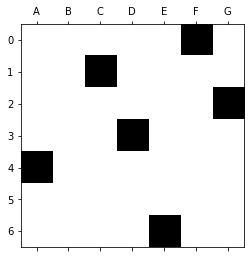

In [17]:
print_s(78)

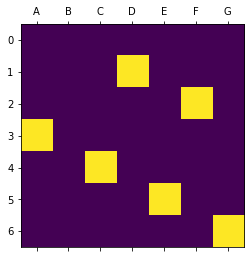

In [14]:
print_s(773)

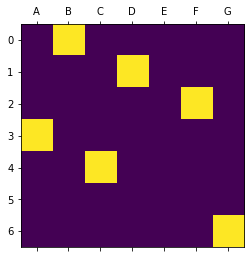

In [15]:
print_s(768)

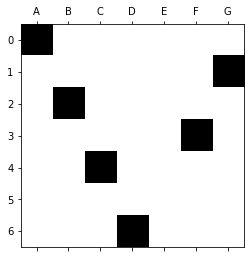

In [18]:
print_s(806)

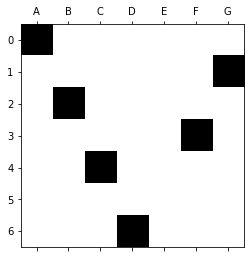

In [22]:
print_s(806)

In [57]:
adj_edges(806, 4)

(array([197, 805, 807], dtype=int64),)

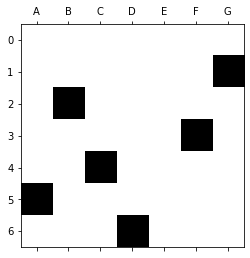

In [21]:
print_s(805)

(array([197, 198, 248, 806], dtype=int64),)


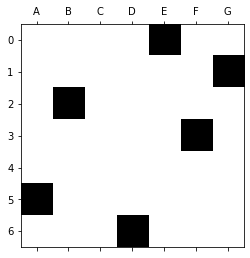

In [20]:
print(adj_edges(805, 4))
print_s(248)

(array([195, 805], dtype=int64),)


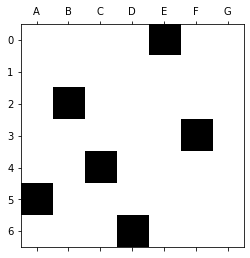

In [19]:
print(adj_edges(248, 4))
print_s(195)

(array([190, 191, 197, 198, 248], dtype=int64),)


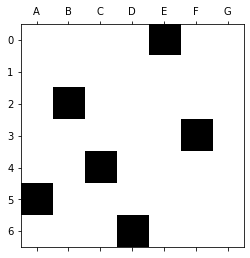

In [23]:
print(adj_edges(195, 4))
print_s(195)

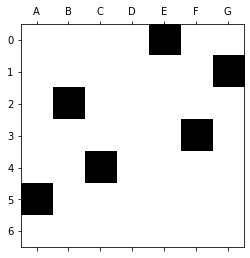

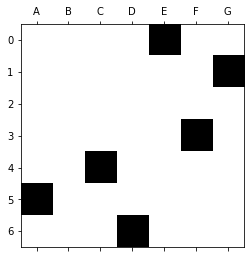

In [69]:
#print(adj_edges(191, 4))
print_s(198)
print_s(191)

(array([191, 193, 195, 196, 197, 805], dtype=int64),)


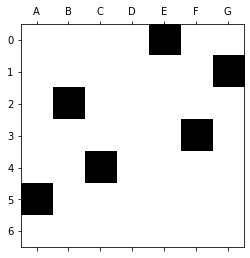

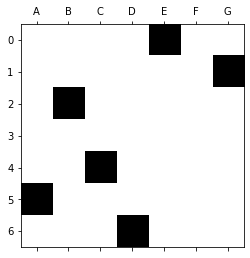

In [67]:
print(adj_edges(198, 3))
print_s(198)
print_s(193)

(array([193, 195, 198, 274], dtype=int64),)


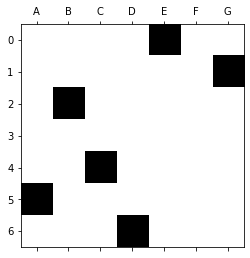

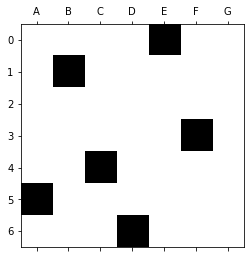

In [44]:
print(adj_edges(191, 4))
print_s(193)
print_s(274)

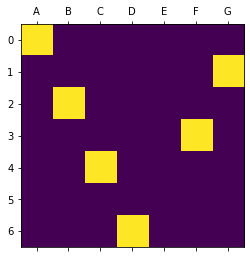

In [19]:
print_s(np.random.randint(832))

In [ ]:
0, 13, 15, 26, 29, 44

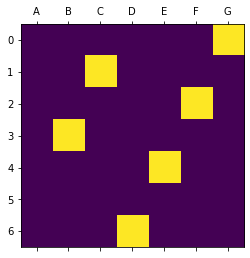

In [35]:
ran = np.random.randint(832)
print_s(ran)

In [59]:
threshold = 5
row, cols = np.where(adj_matrix >= threshold)

In [60]:
edges = zip(row.tolist(), cols.tolist())

In [94]:
gr = nx.Graph()
gr.add_edges_from(edges)

In [95]:
nx.number_connected_components(gr)

132

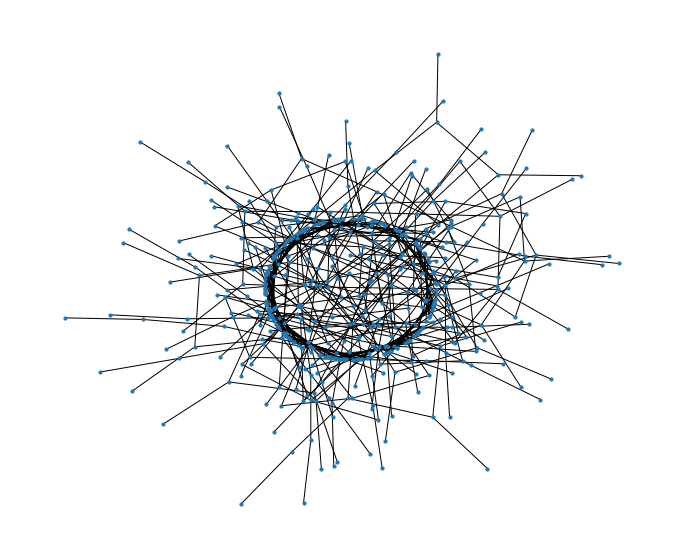

In [96]:
fig, ax = plt.subplots(figsize=(12,10)) 
nx.draw_kamada_kawai(gr, node_size=10, ax=ax)

In [127]:
threshold = 4
row, cols = np.where(adj_matrix >= threshold)
edges = zip(row.tolist(), cols.tolist())
#edges[10]
gr = nx.Graph()

In [128]:
coord_list = [[806, 805], [805, 248], [248,195]]

In [129]:
for l in coord_list:
    print(l)

[806, 805]
[805, 248]
[248, 195]


In [130]:
[806, 805] in coord_list

True

In [131]:
for s in range(nSolutions):
    for t in range(nSolutions):
        if  adj_matrix[s,t] > threshold:
            #print([s,t])
            if [s,t] in coord_list or [t,s] in coord_list:
                gr.add_edge(s, t, color='r')
                print('hi')
            else:
                gr.add_edge(s, t, color='b')

hi
hi
hi
hi
hi
hi


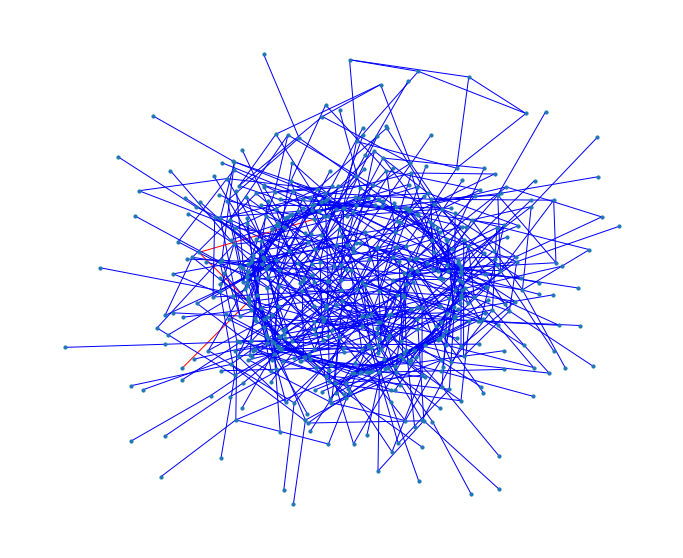

In [132]:
e = gr.edges()
colors = nx.get_edge_attributes(gr,'color').values()
#weights = [gr[u][v]['weight'] for u,v in e]

fig, ax = plt.subplots(figsize=(12,10)) 
nx.draw_kamada_kawai(gr, node_size=10, ax=ax, edge_color = colors)

#nx.draw(gr, edge_color=colors)

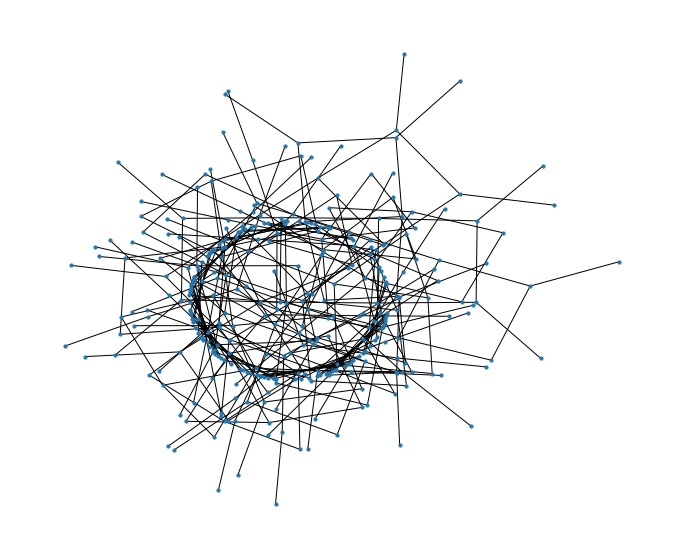

In [93]:
#.add_edges_from(edges)
fig, ax = plt.subplots(figsize=(12,10)) 
nx.draw_kamada_kawai(gr, node_size=10, ax=ax)

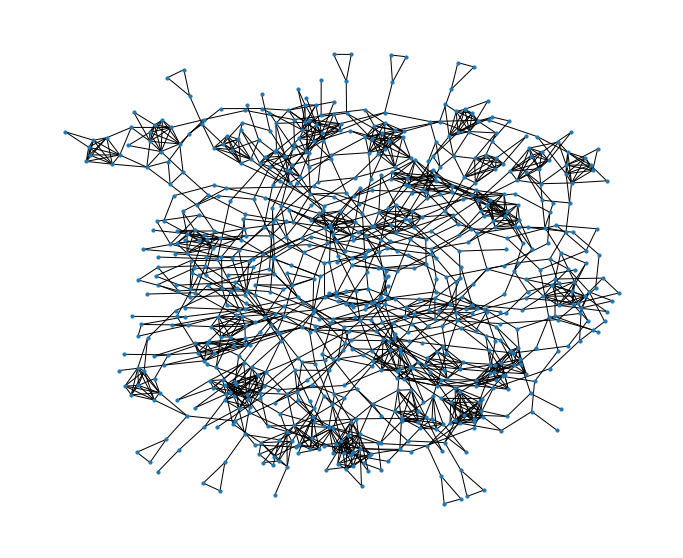

In [39]:
fig, ax = plt.subplots(figsize=(12,10)) 
nx.draw_kamada_kawai(gr, node_size=10, ax=ax)

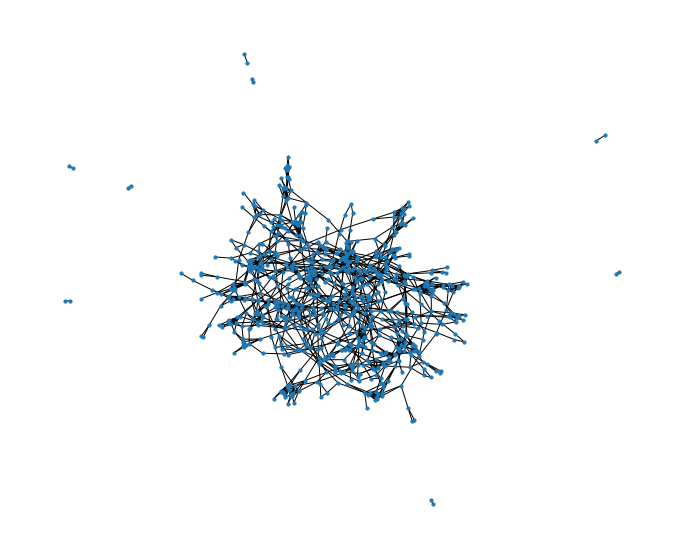

In [25]:
fig, ax = plt.subplots(figsize=(12,10)) 
nx.draw(gr, node_size=10)

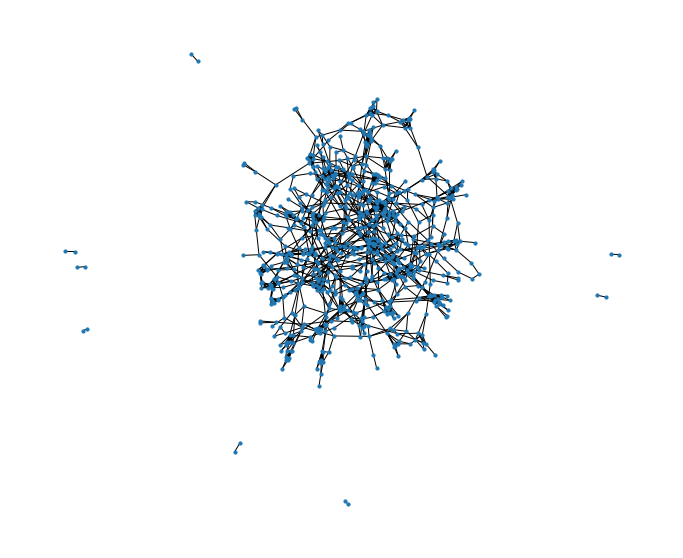

In [17]:
fig, ax = plt.subplots(figsize=(12,10)) 
nx.draw(gr, node_size=10, ax=ax)

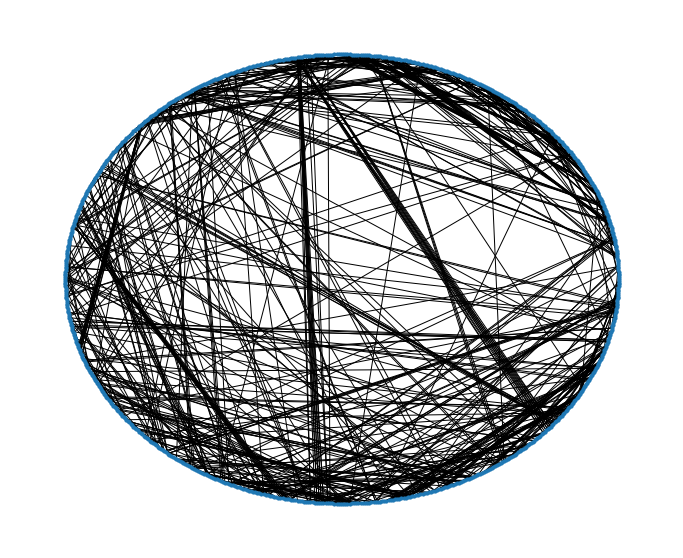

In [18]:
fig, ax = plt.subplots(figsize=(12,10)) 
nx.draw_circular(gr, node_size=10, ax=ax)

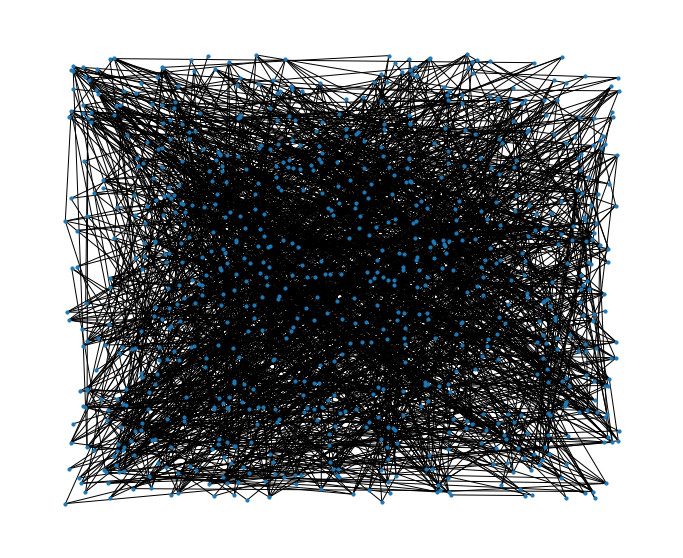

In [19]:
fig, ax = plt.subplots(figsize=(12,10)) 
nx.draw_random(gr, node_size=10, ax=ax)

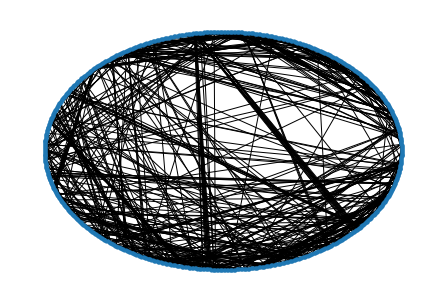

In [20]:
nx.draw_circular(gr, node_size=10)

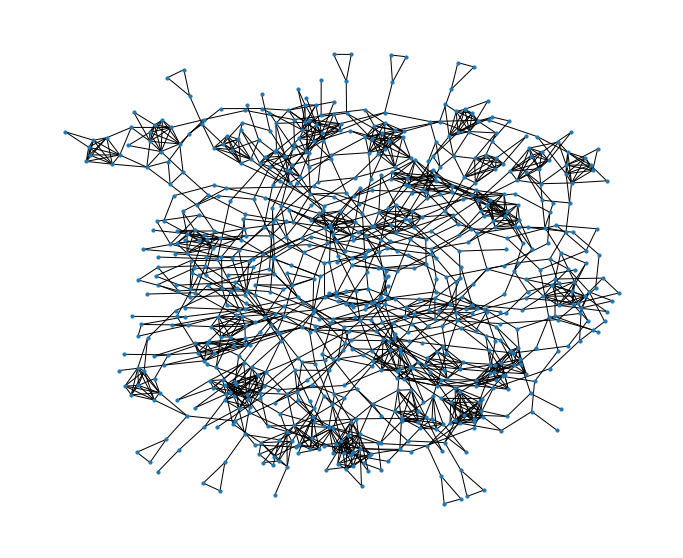

In [21]:
fig, ax = plt.subplots(figsize=(12,10)) 
nx.draw_kamada_kawai(gr, node_size=10, ax=ax)